In [47]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from os.path import join
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix, mean_absolute_error
%matplotlib inline

In [4]:
ls /glade/p/cisl/aiml/dgagne/cam_run5_models_20190726

dnn_classifier_scores.csv  dnn_nr_neg_fortran.nc     input_scale_values.csv
dnn_nc_class.h5            dnn_nr_pos.h5             meta_test.csv
dnn_nc_class_fortran.nc    dnn_nr_pos_fortran.nc     output_scale_values.csv
dnn_nc_pos.h5              dnn_qr_class.h5           test_cam_labels.csv
dnn_nc_pos_fortran.nc      dnn_qr_class_fortran.nc   test_cam_values.csv
dnn_nr_class.h5            dnn_qr_pos.h5             test_prediction_labels.csv
dnn_nr_class_fortran.nc    dnn_qr_pos_fortran.nc     test_prediction_values.csv
dnn_nr_neg.h5              dnn_regressor_scores.csv


In [5]:
!head -n 2 /glade/p/cisl/aiml/dgagne/cam_run5_models_20190726/test_prediction_labels.csv

index,qrtend_TAU,nctend_TAU,nrtend_TAU
0,1.0,1.0,1.0


In [6]:
path = "/glade/p/cisl/aiml/dgagne/cam_run5_models_20190726"
pred_labels = pd.read_csv(join(path, "test_prediction_labels.csv"), index_col="index")
cam_labels = pd.read_csv(join(path, "test_cam_labels.csv"), index_col="index")

/glade/work/dgagne/ncar_pylib_dl_10/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [19]:
cms = {}
for var in ["qrtend_TAU", "nctend_TAU"]:
    print(var)
    cms[var] = np.zeros((2, 2))
    cms[var][0, 0] = np.count_nonzero((pred_labels[var] == 1) & (cam_labels[var] == 1))
    cms[var][0, 1] = np.count_nonzero((pred_labels[var] == 1) & (cam_labels[var] == 0))
    cms[var][1, 0] = np.count_nonzero((pred_labels[var] == 0) & (cam_labels[var] == 1))
    cms[var][1, 1] = np.count_nonzero((pred_labels[var] == 0) & (cam_labels[var] == 0))

qrtend_TAU
nctend_TAU


In [23]:
varn = "nrtend_TAU"
cms[varn] = np.zeros((3, 3))
label_vals = np.array([-1, 0, 1])
for p, pl in enumerate(label_vals):
    for c, cl in enumerate(label_vals):
        cms[varn][p, c] = np.count_nonzero((pred_labels[varn] == pl) & (cam_labels[varn] == cl))


In [31]:
np.round(cms[varn] / cms[varn].sum() * 100, 1).sum(axis=1)

array([35.4, 43.5, 21.1])

In [33]:
np.diagonal(cms[varn]).sum() / cms[varn].sum()

0.98451603937624

In [20]:
for var in ["qrtend_TAU", "nctend_TAU"]:
    cm_per = cms[var] / cms[var].sum()
    print(cm_per)
    print(cm_per[0, 0] + cm_per[1, 1])

[[0.41674942 0.00732713]
 [0.0078576  0.56806586]]
0.9848152775301509
[[0.52962673 0.00490652]
 [0.00177727 0.46368948]]
0.9933162088884889


In [34]:
pred_values = pd.read_csv(join(path, "test_prediction_values.csv"), index_col="index")
cam_values = pd.read_csv(join(path, "test_cam_values.csv"), index_col="index")

/glade/work/dgagne/ncar_pylib_dl_10/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


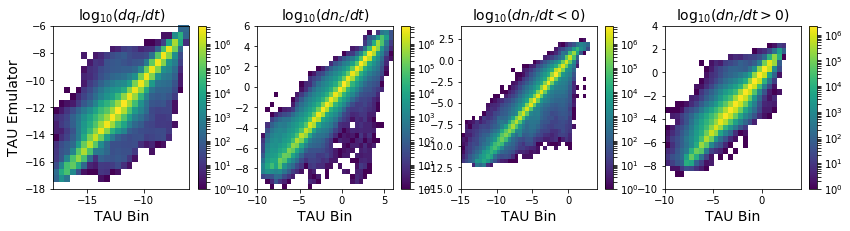

In [54]:
bins = {}
bins["qrtend_TAU_1"] = np.arange(-18, -5.5, 0.5)
bins["nctend_TAU_1"] = np.arange(-10, 6.5, 0.5)
bins["nrtend_TAU_-1"] = np.arange(-15, 4.5, 0.5)
bins["nrtend_TAU_1"] = np.arange(-10, 4.5, 0.5)
xlabel = "TAU Bin"
ylabel = "TAU Emulator"
plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
plt.hist2d(cam_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU"], 
           pred_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU_1"], bins=(bins["qrtend_TAU_1"], bins["qrtend_TAU_1"]), 
           norm=LogNorm(), cmin=1)
plt.colorbar()
plt.xlabel(xlabel, fontsize=14)
plt.ylabel(ylabel, fontsize=14)
plt.title("$\log_{10}$($dq_r/dt)$", fontsize=14)
plt.subplot(1, 4, 2)
plt.hist2d(cam_values.loc[cam_labels["nctend_TAU"] == 1, "nctend_TAU"], 
           pred_values.loc[cam_labels["nctend_TAU"] == 1, "nctend_TAU_1"], bins=(bins["nctend_TAU_1"], bins["nctend_TAU_1"]), 
           norm=LogNorm(), cmin=1)
plt.colorbar()
plt.xlabel(xlabel, fontsize=14)
plt.title("$\log_{10}$($dn_c/dt)$", fontsize=14)
plt.subplot(1, 4, 3)
plt.hist2d(cam_values.loc[cam_labels["nrtend_TAU"] == -1, "nrtend_TAU"], 
           pred_values.loc[cam_labels["nrtend_TAU"] == -1, "nrtend_TAU_-1"], bins=(bins["nrtend_TAU_-1"], bins["nrtend_TAU_-1"]), 
           norm=LogNorm(), cmin=1)
plt.colorbar()
plt.xlabel(xlabel, fontsize=14)
plt.title("$\log_{10}$($dn_r/dt < 0)$", fontsize=14)
plt.subplot(1, 4, 4)
plt.hist2d(cam_values.loc[cam_labels["nrtend_TAU"] == 1, "nrtend_TAU"], 
           pred_values.loc[cam_labels["nrtend_TAU"] == 1, "nrtend_TAU_1"], bins=(bins["nrtend_TAU_1"], bins["nrtend_TAU_1"]), 
           norm=LogNorm(), cmin=1)
plt.colorbar()
plt.xlabel(xlabel, fontsize=14)
plt.title("$\log_{10}$($dn_r/dt > 0)$", fontsize=14)
plt.savefig("tau_bin_hists_20190726.png", dpi=200, bbox_inches="tight")

In [41]:
cam_values["qrtend_TAU"].max()

0.0

In [46]:
np.corrcoef(cam_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU"], 
           pred_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU_1"])

array([[1.        , 0.99565188],
       [0.99565188, 1.        ]])

In [55]:
np.corrcoef(cam_values.loc[cam_labels["nctend_TAU"] == 1, "nctend_TAU"], 
           pred_values.loc[cam_labels["nctend_TAU"] == 1, "nctend_TAU_1"])

array([[1.       , 0.9977215],
       [0.9977215, 1.       ]])

In [56]:
np.corrcoef(cam_values.loc[cam_labels["nrtend_TAU"] == 1, "nrtend_TAU"], 
           pred_values.loc[cam_labels["nrtend_TAU"] == 1, "nrtend_TAU_1"])

array([[1.        , 0.98912151],
       [0.98912151, 1.        ]])

In [57]:
np.corrcoef(cam_values.loc[cam_labels["nrtend_TAU"] == -1, "nrtend_TAU"], 
           pred_values.loc[cam_labels["nrtend_TAU"] == -1, "nrtend_TAU_-1"])

array([[1.        , 0.99776167],
       [0.99776167, 1.        ]])

In [48]:
mean_absolute_error(cam_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU"], 
           pred_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU_1"])

0.09578789208455017

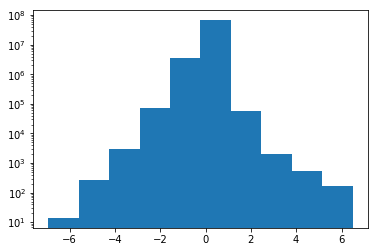

In [50]:
plt.hist(cam_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU"] -  
           pred_values.loc[cam_labels["qrtend_TAU"] == 1, "qrtend_TAU_1"])
plt.gca().set_yscale("log")